## Classification on AReM Dataset

Data Location - https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29

### Problem statement:
1. Perform Logistic Regression on the dataset
2. WAP to read folder name and make a label in the csv with the folder name
3. Remove unnecessary info in automated way
4. Must use only Logistic Regression - no other algorithm to be used
5. Try to utilize multiple solvers and make multiple models
6. Provide the best models
7. EDA must be done accordingly 

Note: No manual approaches to be taken at any point

### Approach used
- Modular approach taken to maximise reusability of code
- Data downloaded in zip file - extraction and ingestion done by the program automatically
- Data labels assigned based on the parent folder name (activity)
- EDA and visualizations 
- Outlier detection (removal not done in Ver 1.0)
- Logistic Regression applied with multiple solvers on unscaled (raw) and scaled data

In [296]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, multilabel_confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, recall_score, roc_curve
from zipfile import ZipFile
import os
import csv
%matplotlib inline

#### Extract zip file and ingest in the dataframe + assign labels

In [2]:
ls 

AREM_Data_xx/                      datacleaning pandas.pdf
AReM.zip                           matplotlib.pdf
AReM_Logistic_Regression.ipynb     numpy assignment.pdf
Assignment 1 - Anuj Gupta.ipynb    python assignment 1.pdf
Assignment 2 - Anuj Gupta.ipynb    python assignment 2.pdf
Assignment 3 - Anuj Gupta.ipynb    python assignment 3.pdf
Assignment exception handling.pdf  python assignment 4.pdf
data visualization assignment.pdf


In [3]:
with ZipFile("AReM.zip", 'r') as zipObj:
    zipObj.extractall('AREM_Data')

In [4]:
#Creating the dataframe structure - data to be filled in subsequent steps
df = pd.DataFrame(columns=['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23', 'Label'])
df.head()

In [6]:
def readfile(filepath, filename, label):
    '''User defined function to read a CSV and return ONLY data rows into a dataframe'''
    full_path = os.path.join(filepath, filename)
    num_extra_rows = 0
    with open(full_path, 'r') as infile:
        for row in csv.reader(infile):
            if(len(row) == 1):
                num_extra_rows = num_extra_rows+1
    num_extra_rows = num_extra_rows+1  #Remove the header row as well    
    df1 = pd.read_csv(full_path, skiprows=num_extra_rows, header=None, index_col=None, names=['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23', 'Label'])
    df1['Label'] = label
    return(df1)

In [7]:
directory = '/Users/anujgupta/Documents/iNeuron/Assignments/AREM_Data/'
df = pd.DataFrame(columns=['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23', 'Label'])

for root, subdirs, files in os.walk(directory):
    for subdir in subdirs:
        print("Folder:", subdir)
        for root1, subdirs1, files1 in os.walk(os.path.join(directory, subdir)):
            for names in files1:
                print("Dataset size: ", len(df))
                try:
                    df_temp = readfile(os.path.join(directory, subdir), names, subdir)
                    print(df_temp.shape)
                    df = df.append(df_temp, ignore_index=True)
                except Exception as e:
                    print(e)


Folder: bending1
Dataset size:  0
(480, 8)
Dataset size:  480
(480, 8)
Dataset size:  960
(480, 8)
Dataset size:  1440
(480, 8)
Dataset size:  1920
(480, 8)
Dataset size:  2400
(480, 8)
Dataset size:  2880
(480, 8)
Folder: walking
Dataset size:  3360
(480, 8)
Dataset size:  3840
(480, 8)
Dataset size:  4320
(480, 8)
Dataset size:  4800
(480, 8)
Dataset size:  5280
(480, 8)
Dataset size:  5760
(480, 8)
Dataset size:  6240
(480, 8)
Dataset size:  6720
(480, 8)
Dataset size:  7200
(480, 8)
Dataset size:  7680
(480, 8)
Dataset size:  8160
(480, 8)
Dataset size:  8640
(480, 8)
Dataset size:  9120
(480, 8)
Dataset size:  9600
(480, 8)
Dataset size:  10080
(480, 8)
Folder: bending2
Dataset size:  10560
(480, 8)
Dataset size:  11040
(0, 8)
Dataset size:  11040
(480, 8)
Dataset size:  11520
(480, 8)
Dataset size:  12000
(480, 8)
Dataset size:  12480
(480, 8)
Folder: standing
Dataset size:  12960
(480, 8)
Dataset size:  13440
(480, 8)
Dataset size:  13920
(480, 8)
Dataset size:  14400
(480, 8)
D

In [23]:
df['Label'].unique()

array(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying',
       'cycling'], dtype=object)

In [8]:
df.head()

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1


In [9]:
df.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000
mean,39.021121,1.472970,14.348414,1.513248,16.011230,1.631269
std,6.297484,2.055411,5.414506,1.644231,6.768319,1.642659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,11.500000,0.430000,12.000000,0.470000
50%,40.000000,0.500000,15.000000,0.830000,15.750000,1.000000
75%,44.000000,1.870000,18.000000,2.350000,19.250000,2.360000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


#### Visualizing the data

In [10]:
#Counting null values through dataframe function
df.isnull().sum()

Time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
Label        0
dtype: int64

<AxesSubplot:>

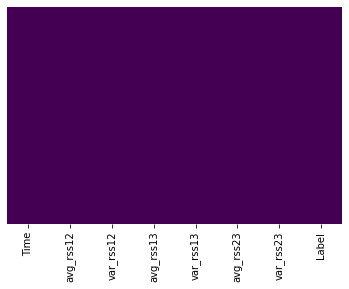

In [11]:
#Visualizing count of null values - sns.heatmap()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

<function matplotlib.pyplot.show(close=None, block=None)>

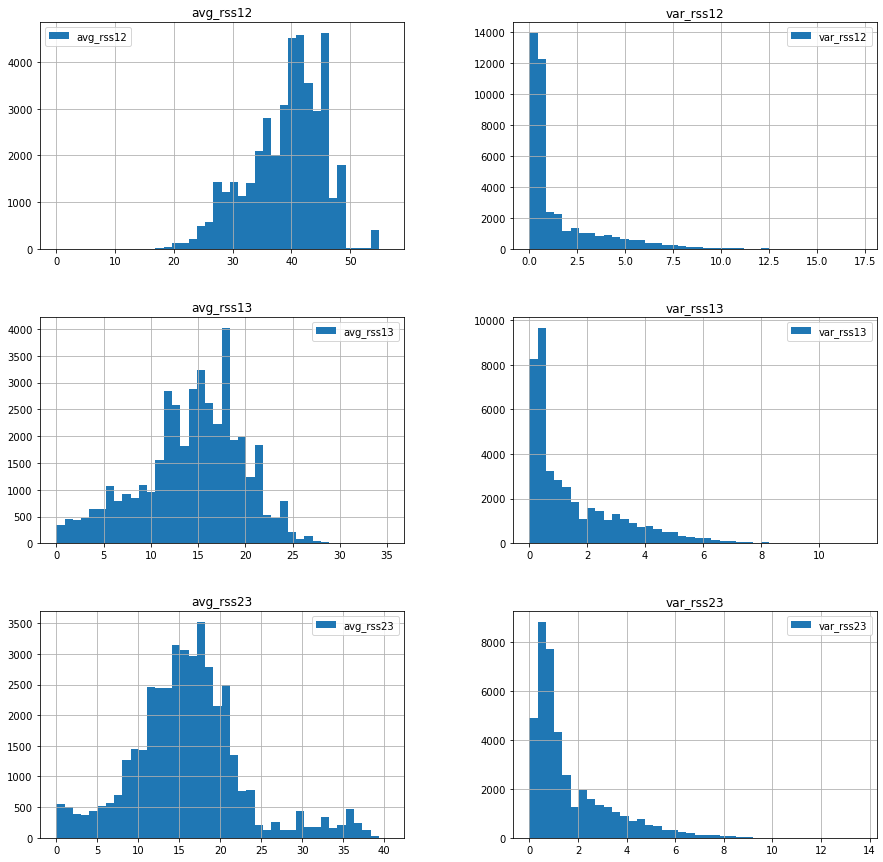

In [22]:
df.hist(bins=40, figsize=(15,15), legend=True)
plt.show

A study of the df.describe() and abobe histograms suggests presence of outliers in some of the variables. Also, the data distribution seems close to normal in all the cases.

Let's take a look at the boxplots to visualize the outliers.

<AxesSubplot:xlabel='avg_rss12', ylabel='Count'>

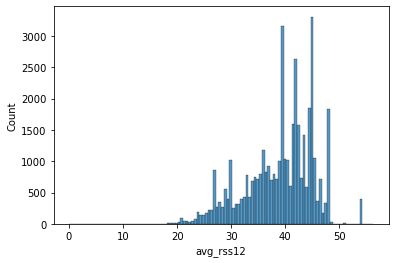

In [85]:
sns.histplot(data=df, x='avg_rss12',  kde=False)

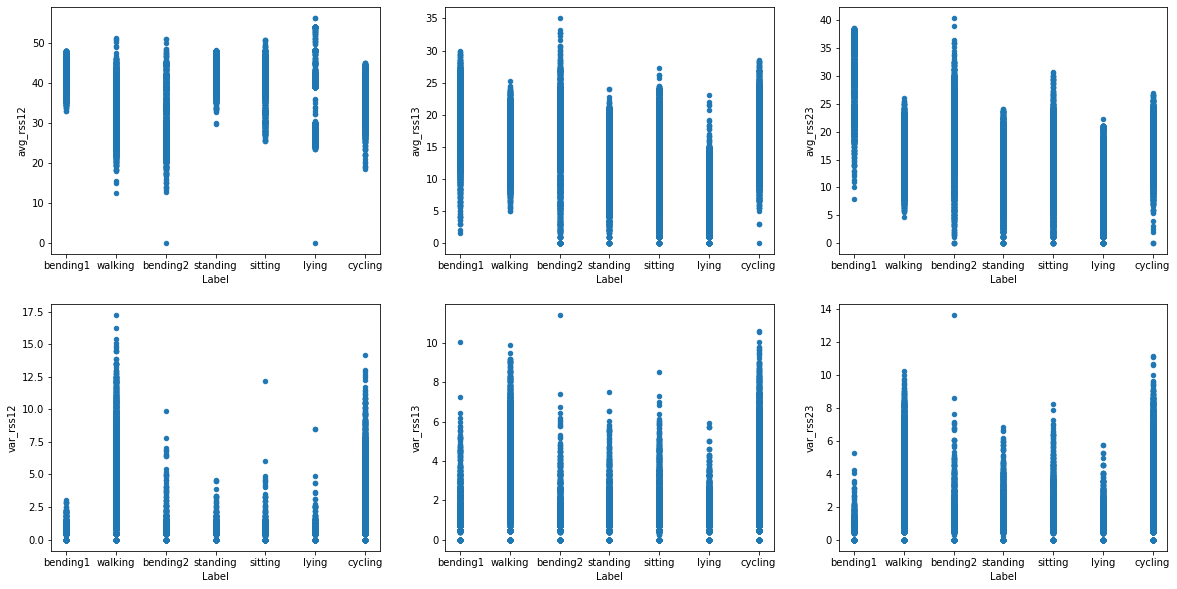

In [76]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
df.plot(kind="scatter", y='avg_rss12', x="Label", ax=ax[0,0])
df.plot(kind="scatter", y='avg_rss13', x="Label", ax=ax[0,1])
df.plot(kind="scatter", y='avg_rss23', x="Label", ax=ax[0,2])
df.plot(kind="scatter", y='var_rss12', x="Label", ax=ax[1,0])
df.plot(kind="scatter", y='var_rss13', x="Label", ax=ax[1,1])
df.plot(kind="scatter", y='var_rss23', x="Label", ax=ax[1,2])
plt.show()

<AxesSubplot:xlabel='Label', ylabel='var_rss23'>

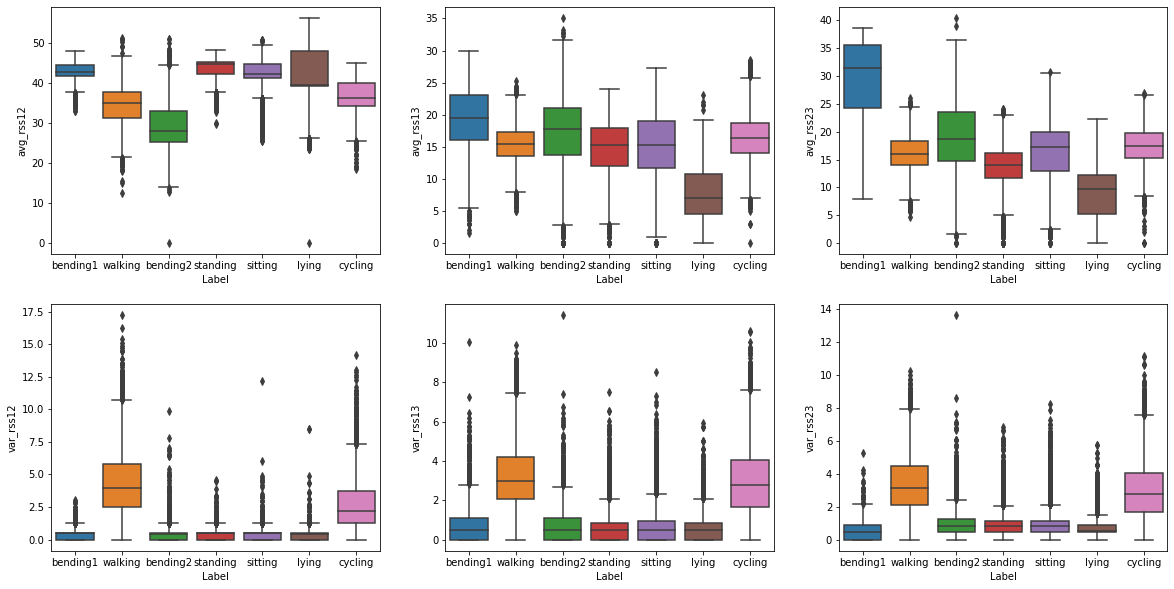

In [67]:
fig, ax = plt.subplots(2, 3, figsize= (20,10))
sns.boxplot(y='avg_rss12', x='Label', data=df, ax=ax[0,0])
sns.boxplot(y='avg_rss13', x='Label', data=df, ax=ax[0,1])
sns.boxplot(y='avg_rss23', x='Label', data=df, ax=ax[0,2])
sns.boxplot(y='var_rss12', x='Label', data=df, ax=ax[1,0])
sns.boxplot(y='var_rss13', x='Label', data=df, ax=ax[1,1])
sns.boxplot(y='var_rss23', x='Label', data=df, ax=ax[1,2])


<AxesSubplot:>

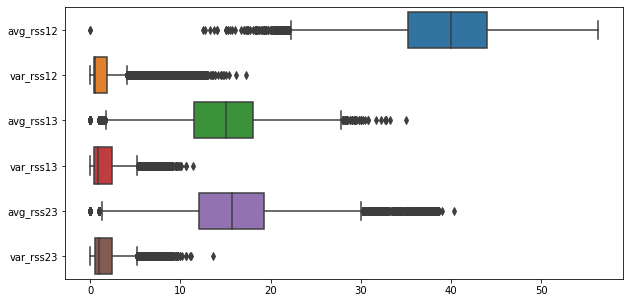

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df.drop(columns='Time'), ax=ax, orient="h")

<AxesSubplot:xlabel='Label', ylabel='var_rss23'>

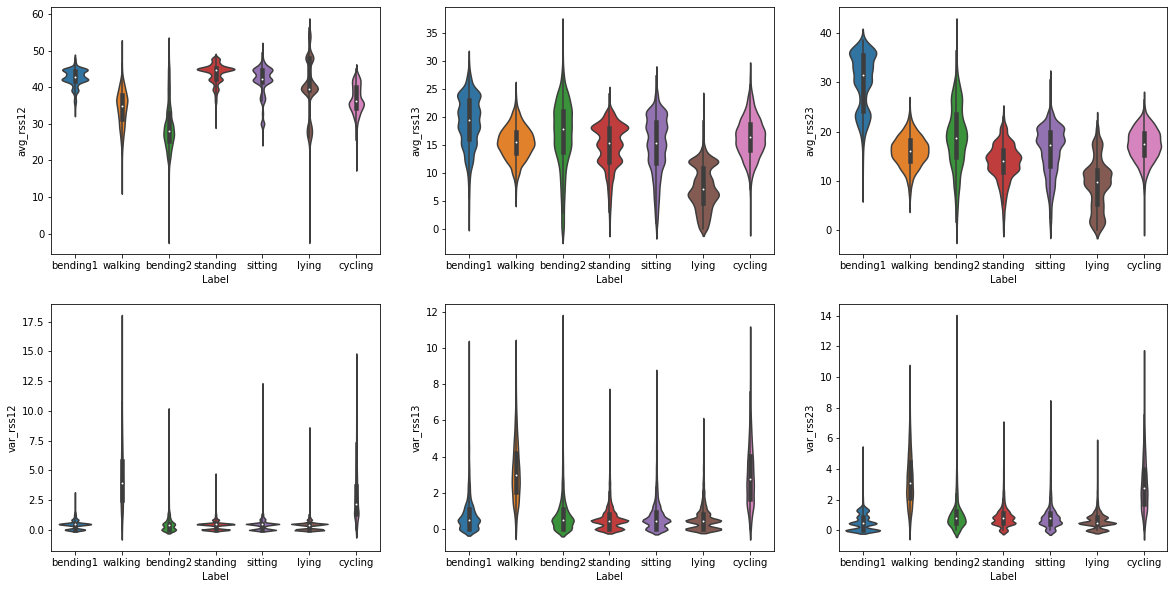

In [94]:
#Violin plot - Boxplot and KDE in one - another suggestion at distribution & skewness

fig, ax = plt.subplots(2, 3, figsize= (20,10))
sns.violinplot(y='avg_rss12', x='Label', data=df, ax=ax[0,0])
sns.violinplot(y='avg_rss13', x='Label', data=df, ax=ax[0,1])
sns.violinplot(y='avg_rss23', x='Label', data=df, ax=ax[0,2])
sns.violinplot(y='var_rss12', x='Label', data=df, ax=ax[1,0])
sns.violinplot(y='var_rss13', x='Label', data=df, ax=ax[1,1])
sns.violinplot(y='var_rss23', x='Label', data=df, ax=ax[1,2])

The above graphs suggest presence of outliers in both the 'avg' and 'var' data points. While 'var' has outliers only in one direction, 'avg' has in both.

We attempt to remove the outliers in the following section.

<AxesSubplot:xlabel='avg_rss12', ylabel='var_rss12'>

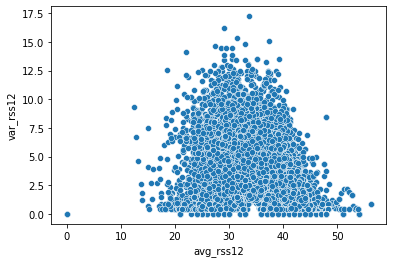

In [100]:
sns.scatterplot(x='avg_rss12', y='var_rss12', data=df)

#### Outlier detection

In [175]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3-Q1
threshold = IQR * 1.5
threshold_upper = Q3 + threshold * 1.5
threshold_lower = Q1 - threshold * 1.5
print("Upper threshold:\n", threshold_upper, end='\n\n***\n\n')
print("Lower threshold:\n", threshold_lower)

Upper threshold:
 avg_rss12    63.6875
var_rss12     5.1100
avg_rss13    32.6250
var_rss13     6.6700
avg_rss23    35.5625
var_rss23     6.6125
dtype: float64

***

Lower threshold:
 avg_rss12    15.5625
var_rss12    -2.8100
avg_rss13    -3.1250
var_rss13    -3.8900
avg_rss23    -4.3125
var_rss23    -3.7825
dtype: float64


In [152]:
#df_new = pd.DataFrame(df[(df<threshold_upper) | (df > threshold_lower)])

<AxesSubplot:xlabel='Label', ylabel='count'>

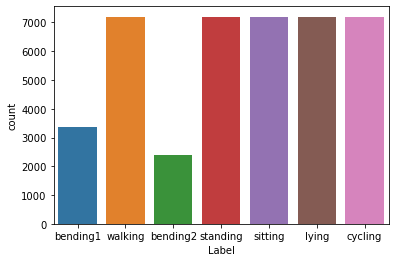

In [143]:
sns.countplot(x=df["Label"])

In [379]:
#df_new = pd.DataFrame()
#df_new = df[(df > threshold_lower) & (df < threshold_upper)]

In [380]:
#fig, ax = plt.subplots(figsize=(10,5))
#sns.boxplot(data=df_new.drop(columns='Time'), ax=ax, orient="h")

In [381]:
#fig, ax = plt.subplots(figsize=(10,5))
#sns.boxplot(data=df.drop(columns='Time'), ax=ax, orient="h")

#### Data wrangling
1. Drop 'Time' column as it serves no purpose
2. Replace the category names with numerical values for the algorithm
3. Stratified sampling for splitting into train_test
4. Standard scaler for standardization


In [185]:
df.drop(columns='Time', inplace=True)

In [186]:
df.Label.unique()

array(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying',
       'cycling'], dtype=object)

In [188]:
df['Label'] = df['Label'].map({'bending1': 1, 'walking': 2, 'bending2': 3, 'standing': 4,
                              'sitting': 5, 'lying': 6, 'cycling': 7})

In [191]:
df.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,42.00,0.00,18.50,0.50,12.00,0.00,1
1,42.00,0.00,18.00,0.00,11.33,0.94,1
2,42.75,0.43,16.75,1.79,18.25,0.43,1
3,42.50,0.50,16.75,0.83,19.00,1.22,1
4,43.00,0.82,16.25,0.83,18.00,0.00,1


# 

Stratified train_test split for proportionate representation of each label in the traun_test subsets

In [280]:
#Proportions of the Labels in the original dataframe
df['Label'].value_counts()/len(df['Label'])

2    0.172418
4    0.172418
6    0.172418
7    0.172418
5    0.172394
1    0.080462
3    0.057473
Name: Label, dtype: float64

In [279]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Label'), df['Label'], train_size=0.7, random_state=42, stratify=df['Label'])

In [285]:
#Label proportions maintained in the test datasets
pd.DataFrame(y_train)['Label'].value_counts()/len(pd.DataFrame(y_train)['Label'])

4    0.172420
7    0.172420
6    0.172420
2    0.172420
5    0.172385
1    0.080463
3    0.057473
Name: Label, dtype: float64

In [333]:
pd.DataFrame(y_test)['Label'].value_counts()/len(pd.DataFrame(y_test)['Label'])

6    0.172414
2    0.172414
5    0.172414
4    0.172414
7    0.172414
1    0.080460
3    0.057471
Name: Label, dtype: float64

#### Model training without scaling

In [316]:
def print_scores(y_test, y_predicted, solver):
    print("Solver: {}\n".format(solver))
    print("Accuracy score: {}".format(accuracy_score(y_test, y_predicted)))
    print("Precision: {}".format(precision_score(y_test, y_predicted, average="weighted")))
    print("Recall: {}".format(recall_score(y_test, y_predicted, average="weighted")))
    print("F1 Score: {}".format(f1_score(y_test, y_predicted, average="weighted")))
    print("\n\n")
    

In [331]:
def print_conf_mat(y_test, y_predicted):
    conf = confusion_matrix(y_test, y_predicted)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title("Confusion matrix")
    ax.xaxis.set_label_position("top")
    sns.heatmap(pd.DataFrame(conf), cmap='YlGnBu', ax=ax, annot=True, fmt='g')
    plt.tight_layout()
    plt.show()

Solver: sag

Accuracy score: 0.6803959131545338
Precision: 0.6778762455868046
Recall: 0.6803959131545338
F1 Score: 0.6783405749486499


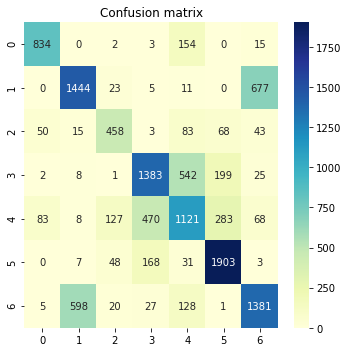

Solver: saga

Accuracy score: 0.6801564495530013
Precision: 0.6776733942643626
Recall: 0.6801564495530013
F1 Score: 0.6781257907486847


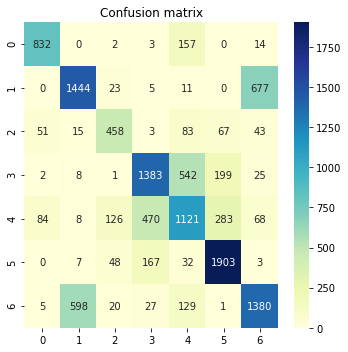

Solver: newton-cg

Accuracy score: 0.6806353767560664
Precision: 0.6779366627262242
Recall: 0.6806353767560664
F1 Score: 0.6784907712231485


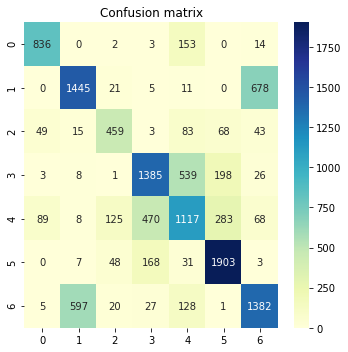

In [332]:
#Iterate over multiple solvers and review each model
solvers = ["sag", "saga", "newton-cg"]
for solver in solvers:
    logmodel_unscaled = LogisticRegression(solver=solver, max_iter=1000)
    logmodel_unscaled.fit(x_train, y_train)
    y_predicted = logmodel_unscaled.predict(x_test)
    print_scores(y_test, y_predicted, solver)     #Print model scores
    print_conf_mat(y_test, y_predicted)           #Print confusion matrix heatmap

We can't perform other metrics like roc_curve() and precision_recall_curve() as those are meant for binary classification problems.

#### Model training with scaling


In [375]:
sscaler = StandardScaler()
sscaler.fit(x_train)
x_train_scaled = sscaler.transform(x_train)
log_scaled = LogisticRegression()

Solver: sag

Accuracy score: 0.6808748403575989
Precision: 0.6782634710022932
Recall: 0.6808748403575989
F1 Score: 0.6787776986299179


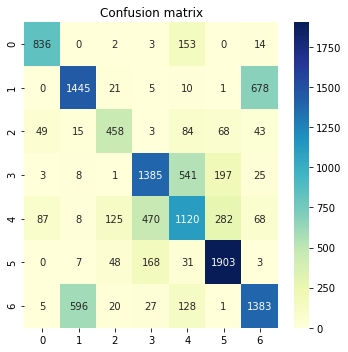

Solver: saga

Accuracy score: 0.6807151979565773
Precision: 0.678089788591987
Recall: 0.6807151979565773
F1 Score: 0.6786143984407086


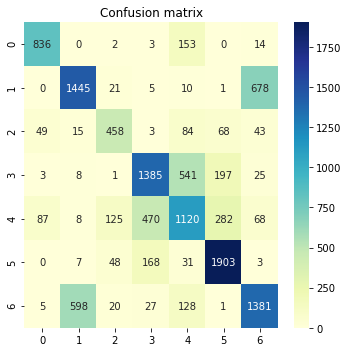

Solver: newton-cg

Accuracy score: 0.6807151979565773
Precision: 0.678089788591987
Recall: 0.6807151979565773
F1 Score: 0.6786143984407086


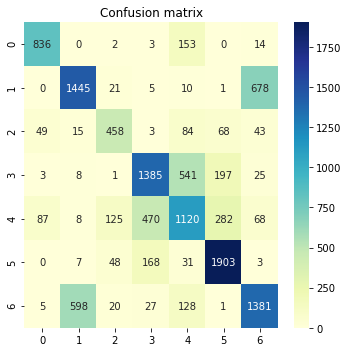

In [376]:
#Iterate over multiple solvers and review each model
solvers = ["sag", "saga", "newton-cg"]
for solver in solvers:
    log_scaled = LogisticRegression(solver=solver, max_iter=1000)
    log_scaled.fit(x_train_scaled, y_train)
    y_pred_scaled = log_scaled.predict(sscaler.transform(x_test))
    print_scores(y_test, y_pred_scaled, solver)     #Print model scores
    print_conf_mat(y_test, y_pred_scaled)           #Print confusion matrix heatmap

### Methodology used

- LogisticRegression() classifier trained with both unscaled and scaled data
- Used StandardScaler() to scale due to the presence of outliers
- Used a numbers of solvers in each case 

### Result
- The results are alarmingly same across scaled/unscaled data and across multiple solvers

### Takeaways & next steps
- Need Outlier control to balance the data
- To ascertain the best algorithm to be used (Logistic Regression or KNeighbours or Random Forest)
- Hyperparameter tuning to be applied to the chosen algorithm for optimization